In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
path = f"gdrive/MyDrive/Mestrado/IA904/Weeds/"

Mounted at /content/gdrive


In [5]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import numpy as np
import cv2
import random

In [25]:
def remove_noise(folder_path):
    images_dir = os.path.join(folder_path, 'images')
    cleaned_images = []

    for image_file in os.listdir(images_dir):
        image_path = os.path.join(images_dir, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        if image is None:
            print(f"Erro ao carregar a imagem: {image_path}")
            continue

        cleaned_image = cv2.medianBlur(image, 3)

        cleaned_images.append(cleaned_image)

    return cleaned_images

In [26]:
def show_random_images(images, num_images):
    if len(images) < num_images:
        print(f"Não há imagens suficientes para exibir. Total de imagens: {len(images)}")
        return

    selected_images = random.sample(images, num_images)

    plt.figure(figsize=(25, 25))
    for i, img in enumerate(selected_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()

In [27]:
cleaned_images_test = remove_noise(os.path.join(path, 'test'))
cleaned_images_train = remove_noise(os.path.join(path, 'train'))
cleaned_images_valid = remove_noise(os.path.join(path, 'valid'))

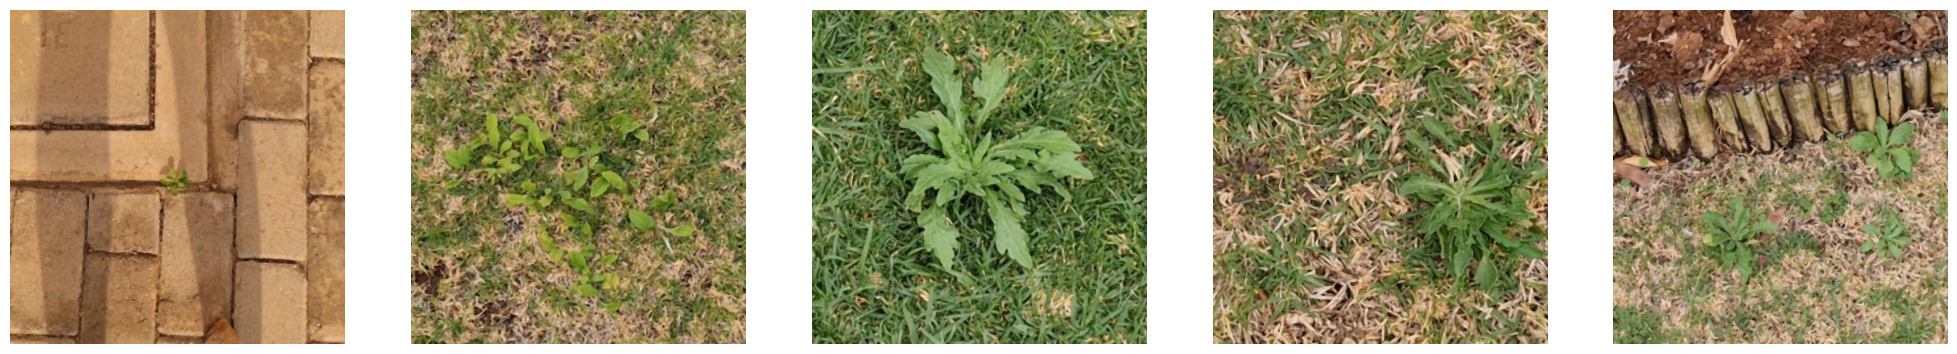

In [28]:
show_random_images(cleaned_images_test, 5)

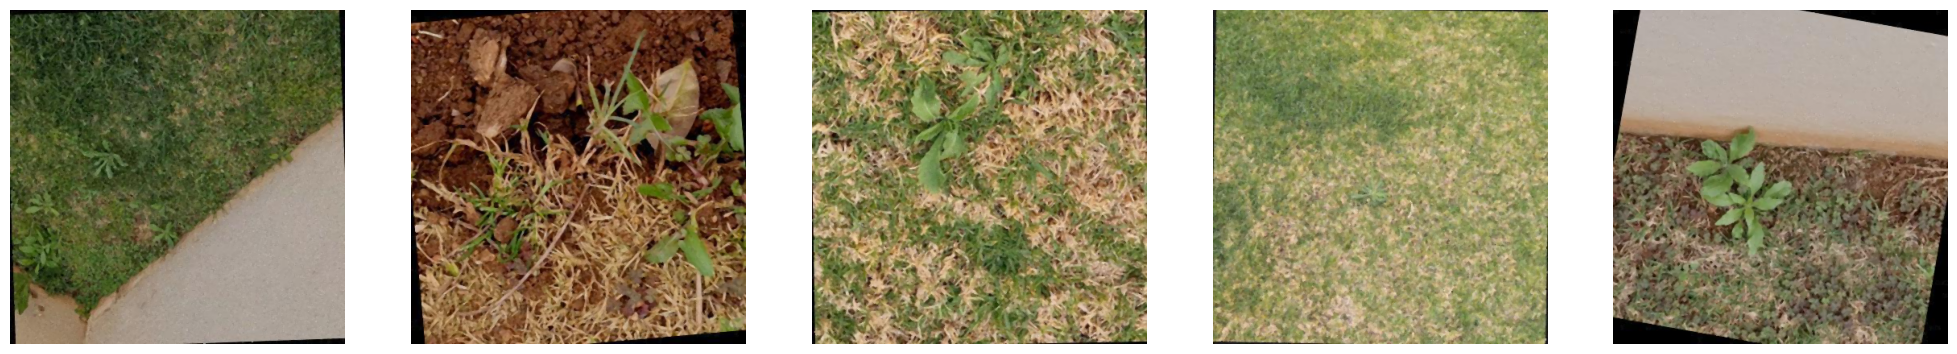

In [29]:
show_random_images(cleaned_images_train, 5)

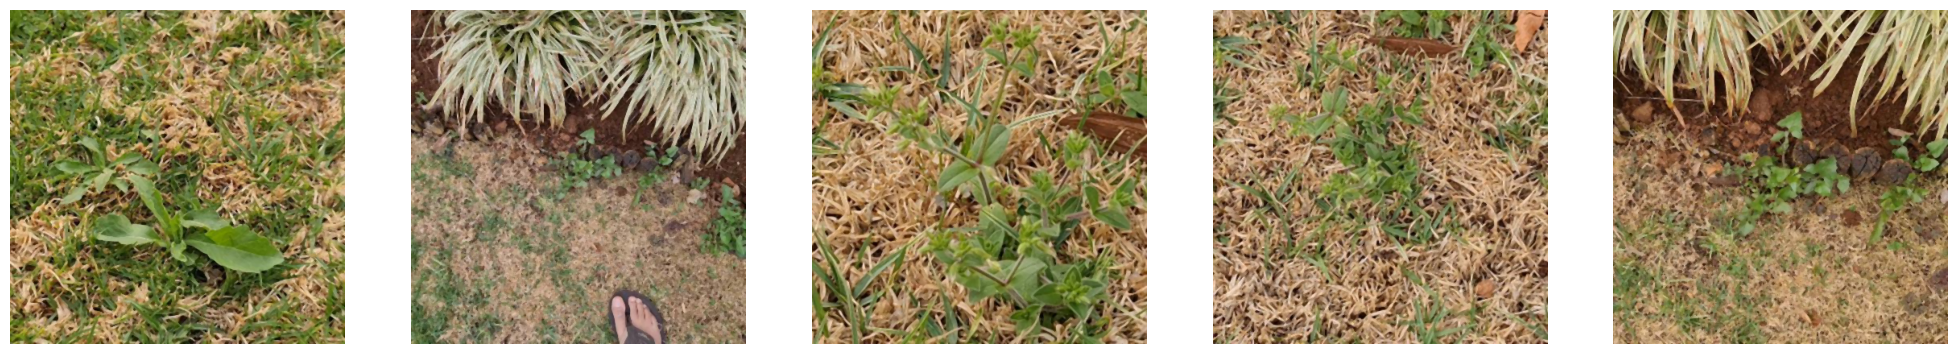

In [30]:
show_random_images(cleaned_images_valid, 5)

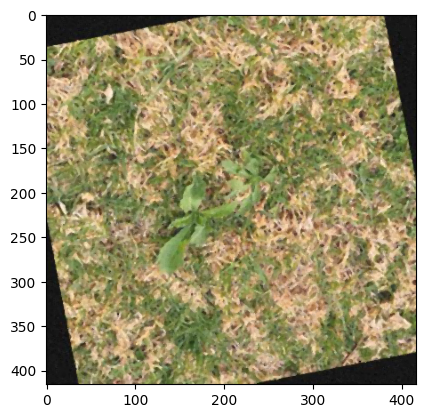

In [34]:
imgTest = cleaned_images_train[0]

plt.imshow(cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB))